In [1]:
import numpy as np

# 原始列表
_total_classes = 10
_known_classes = 5
classes = [i for i in range(_total_classes)][-(_total_classes - _known_classes):]
feature_proto_list = [np.eye(768, dtype=int)[num].tolist() for num in classes]

# 生成 768 维的独热编码列表
nums = [1, 2, 3, 4, 5]
one_hot_vectors = [np.eye(768, dtype=int)[num].tolist() for num in nums]

# 检查结果
assert len(one_hot_vectors) == 5, "列表应包含五个元素"
assert len(one_hot_vectors[0]) == 768, "每个向量应为 768 维"
assert sum(one_hot_vectors[0]) == 1, "每个向量有且仅有一个位置为 1"

# print(one_hot_vectors[0])

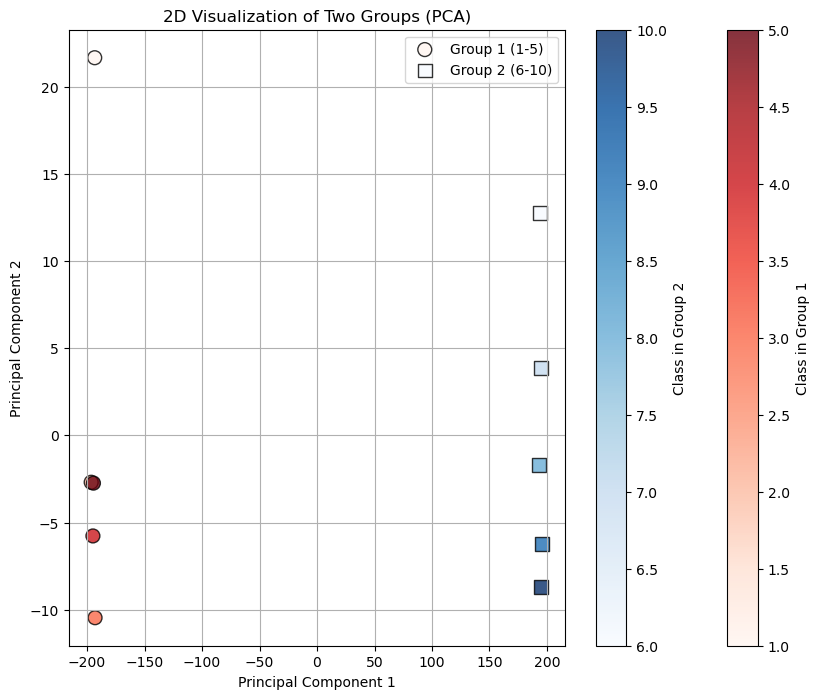

In [5]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 生成两组数据
a = torch.randn(768)  # 基向量 a
b = torch.randn(768)  # 基向量 b

# 第一组数据（classes 1-5，基于基向量 a）
classes1 = [1, 2, 3, 4, 5]
feature_proto_list1 = [torch.randn(768) + 10 * a for _ in classes1]

# 第二组数据（classes 6-10，基于基向量 b）
classes2 = [6, 7, 8, 9, 10]
feature_proto_list2 = [torch.randn(768) + 10 * b for _ in classes2]

# 合并两组数据
all_features = torch.stack(feature_proto_list1 + feature_proto_list2).numpy()
all_classes = classes1 + classes2  # 合并后的类别标签 [1,2,3,4,5,6,7,8,9,10]

# 使用 PCA 降维到 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(all_features)

# 绘制二维散点图，区分两组数据
plt.figure(figsize=(10, 8))

# 第一组（classes 1-5，红色系）
scatter1 = plt.scatter(
    reduced_features[:5, 0],  # 前5个点
    reduced_features[:5, 1],
    c=classes1,               # 颜色映射为类别1-5
    cmap='Reds',             # 红色渐变
    s=100,
    alpha=0.8,
    edgecolors='k',          # 黑色边框
    label='Group 1 (1-5)'
)

# 第二组（classes 6-10，蓝色系）
scatter2 = plt.scatter(
    reduced_features[5:, 0],  # 后5个点
    reduced_features[5:, 1],
    c=classes2,               # 颜色映射为类别6-10
    cmap='Blues',            # 蓝色渐变
    s=100,
    alpha=0.8,
    marker='s',              # 方形标记
    edgecolors='k',
    label='Group 2 (6-10)'
)

# 添加标签和标题
plt.title('2D Visualization of Two Groups (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter1, label='Class in Group 1')
plt.colorbar(scatter2, label='Class in Group 2')
plt.legend()  # 显示图例
plt.grid(True)

plt.show()

In [16]:
import torch

first_task_prototypes = torch.tensor([[1., 1.], [1., -1.]])
first_task_prototypes_ = torch.tensor([[1., .9], [1., -1.2]])

sim = torch.nn.functional.cosine_similarity(first_task_prototypes, first_task_prototypes_)
sim = list(sim.cpu().detach())
sim

a = [[torch.tensor(1.), torch.tensor(1.)], [torch.tensor(0.9986), torch.tensor(0.9959)], [torch.tensor(0.98), torch.tensor(0.95)]]
a = torch.tensor(a)
a
a[:2, :]

tensor([[1.0000, 1.0000],
        [0.9986, 0.9959]])

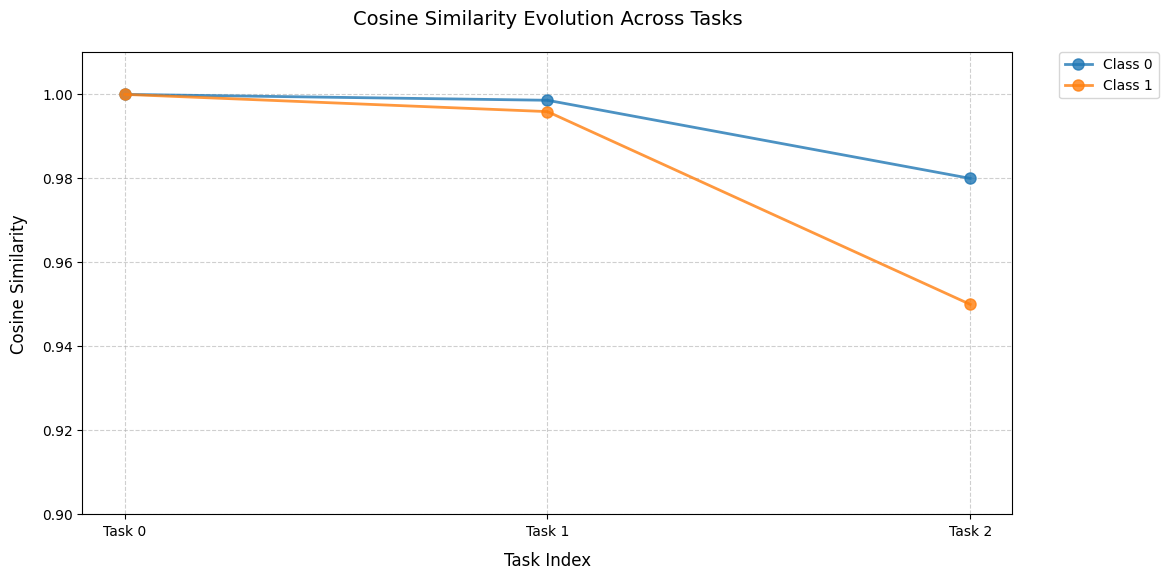

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_class_similarities(cosine_similarity_list):
    plt.figure(figsize=(12, 6))

    # 提取类别数量和任务数量
    num_classes = len(cosine_similarity_list[0])  # 从第一个任务获取类别数
    num_tasks = len(cosine_similarity_list)

    # 创建颜色映射
    colors = [
        '#1f77b4', '#ff7f0e', '#0000FF', '#FF00FF',
        '#9467bd', '#FFD700', '#00FFFF', '#7f7f7f',
        '#FF1493', '#17becf', '#4B0082', '#FF4500'
    ]

    # 为每个类别绘制折线
    for class_idx in range(num_classes):
        # 提取当前类别在所有任务中的相似度值
        y = [tensor[class_idx].item() if isinstance(tensor, (list, tuple)) else tensor.item()
             for tensor in cosine_similarity_list]

        # 生成x轴坐标（任务索引）
        x = list(range(num_tasks))

        plt.plot(x, y,
                 marker='o',
                 linestyle='-',
                 color=colors[class_idx],
                 label=f'Class {class_idx}',
                 alpha=0.8,
                 linewidth=2,
                 markersize=8)
    # 美化图表
    plt.title("Cosine Similarity Evolution Across Tasks", fontsize=14, pad=20)
    plt.xlabel("Task Index", fontsize=12, labelpad=10)
    plt.ylabel("Cosine Similarity", fontsize=12, labelpad=10)
    plt.xticks(range(num_tasks), [f"Task {i}" for i in range(num_tasks)])
    plt.ylim(0.9, 1.01)  # 根据示例数据调整Y轴范围
    plt.grid(True, linestyle='--', alpha=0.6)

    # 添加图例（自动适应类别数量）
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0.,
               fontsize=10,
               ncol=1 if num_classes <= 5 else 2)  # 类别多时分成两列

cosine_similarity_list = [[torch.tensor(1.), torch.tensor(1.)], [torch.tensor(0.9986), torch.tensor(0.9959)], [torch.tensor(0.98), torch.tensor(0.95)]]
plot_class_similarities(cosine_similarity_list)